# Problem Statement : 

# Given above data build a machine learning model that can predict Servived Passangers in Titanic

In [1]:
import pandas as pd # for data frame
import numpy as np # for mathemetical operation
import matplotlib.pyplot as plt # for vizualization
%matplotlib inline
from sklearn import linear_model  #  For regression in Machine Learning
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_curve,roc_auc_score #metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading Dataset
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#all column name of the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#mean of the age 
mean_age = df.Age.mean()
mean_age

29.69911764705882

In [9]:
import math
math.floor(mean_age)

29

In [10]:
#filling null values of Age with its mean
df.Age = df.Age.fillna(df.Age.mean())

In [11]:
#dropping null values
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
#creating feature data and target data
X = df.drop(["Name","Ticket","Survived"],axis=1)
y = df.Survived

In [14]:
#Encoding the categorical data
from sklearn.preprocessing import LabelEncoder

In [15]:
enc = LabelEncoder()

In [16]:
X["Sex"] = enc.fit_transform(X["Sex"])
X["Cabin"] = enc.fit_transform(X["Cabin"])
X["Embarked"] = enc.fit_transform(X["Embarked"])

In [17]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,0,38.0,1,0,71.2833,80,0
3,4,1,0,35.0,1,0,53.1000,54,2
6,7,1,1,54.0,0,0,51.8625,128,2
10,11,3,0,4.0,1,1,16.7000,144,2
11,12,1,0,58.0,0,0,26.5500,48,2


In [18]:
y.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [19]:
#splitting the train and test data
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=20)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
#training the model
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
#accuracy with training dataset
model.score(X_train,y_train)

0.7950310559006211

In [24]:
#accuracy with test data
model.score(X_test,y_test)

0.7560975609756098

In [25]:
#probability of each class from testing data
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.86133791, 0.13866209],
       [0.13024432, 0.86975568],
       [0.33140713, 0.66859287],
       [0.03512924, 0.96487076],
       [0.07578999, 0.92421001],
       [0.11026676, 0.88973324],
       [0.12125403, 0.87874597],
       [0.54434784, 0.45565216],
       [0.74302801, 0.25697199],
       [0.77301289, 0.22698711],
       [0.83128513, 0.16871487],
       [0.13247552, 0.86752448],
       [0.25781113, 0.74218887],
       [0.02545683, 0.97454317],
       [0.03235713, 0.96764287],
       [0.3969692 , 0.6030308 ],
       [0.21744067, 0.78255933],
       [0.81244503, 0.18755497],
       [0.13021661, 0.86978339],
       [0.38401044, 0.61598956],
       [0.03321865, 0.96678135],
       [0.02389638, 0.97610362],
       [0.02550911, 0.97449089],
       [0.1744048 , 0.8255952 ],
       [0.31148152, 0.68851848],
       [0.67234848, 0.32765152],
       [0.64868989, 0.35131011],
       [0.80987675, 0.19012325],
       [0.53092142, 0.46907858],
       [0.45109463, 0.54890537],
       [0.

In [26]:
#prediction with test data 
y_pred = model.predict(X_test)

In [27]:
#confusion metric
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 8,  7],
       [ 3, 23]], dtype=int64)

Text(69.0, 0.5, 'Actual')

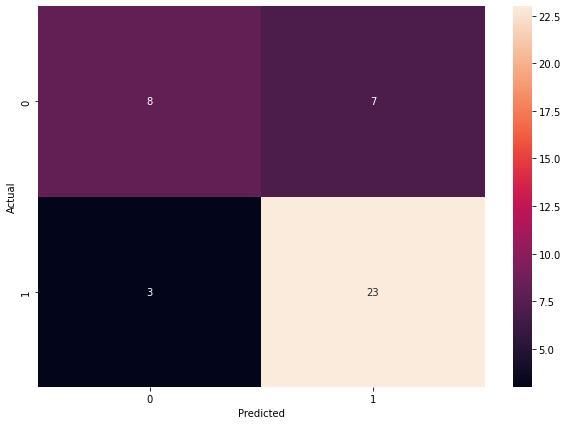

In [28]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [40]:
#accuracy score
accuracy_score(y_test,y_pred)

0.7560975609756098

In [38]:
#precision_score
precision_score(y_test,y_pred)

0.7666666666666667

In [36]:
#recall_score
recall_score(y_test,y_pred)

0.8846153846153846

In [37]:
#f1_score 
f1_score(y_test,y_pred)

0.8214285714285715

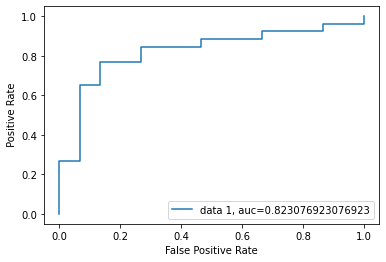

In [33]:
y_pred_prob = model.predict_proba(X_test)[::,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)

plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")
plt.show()

In [41]:
from sklearn.metrics import classification_report
target_names = ['Not_survived', 'Survived']
print(classification_report(y_test,y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not_survived       0.73      0.53      0.62        15
    Survived       0.77      0.88      0.82        26

    accuracy                           0.76        41
   macro avg       0.75      0.71      0.72        41
weighted avg       0.75      0.76      0.75        41

